# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [67]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm   # added by me
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # added by me
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame(
    {'Edad': [17,51,27,21,36,48,19,26,54,30],
     'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

Text(0, 0.5, 'Delay')

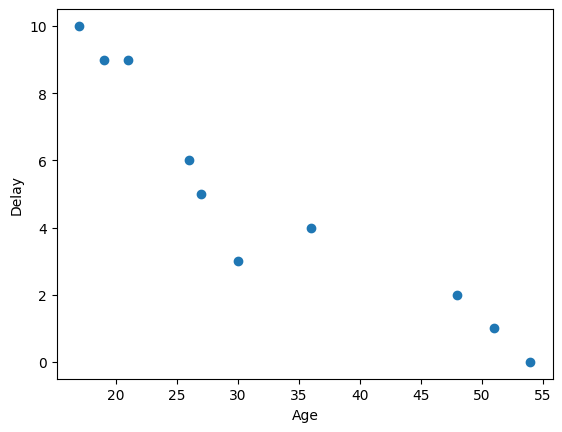

In [5]:
plt.plot(student_data.Edad, student_data.Retrasos, "o")
plt.xlabel('Age')
plt.ylabel('Delay')

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

A primera vista sí parece haber una tendencia entre la edad y el retraso. A más edad menor retraso.

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [10]:
cov = student_data.cov()
corr = student_data.corr()
print(f"Covariance:\n{cov}")
print(f"Correlation:\n{corr}")
# Un resultado negativo tan cercano a -1 sugiere que hay una fuerte correlación negativa
# entre las dos variables.

Covariance:
                Edad   Retrasos
Edad      187.655556 -45.566667
Retrasos  -45.566667  12.544444
Correlation:
              Edad  Retrasos
Edad      1.000000 -0.939163
Retrasos -0.939163  1.000000


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [36]:
# Mi modelo de regresión será una regresión lineal simple
# X tendrá como único predictor la edad
# y corresponde con el retraso (número de retrasos)
X = student_data.Edad.values.reshape(-1, 1) # (n_samples, n_predictors)
y = student_data.Retrasos.values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=321) # fix seed
lm = LinearRegression()
# Let's train the model
lm.fit(X_train, y_train)
# Veamos el resultado:
a0 = lm.intercept_
a1 = lm.coef_[0]
print(f"y = {a0} + {a1} * x")

# Now let's go to the prediction part
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Let's compute the R-square and MSE to help in the evaluation of the model
train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)
mse_train = np.mean((y_train_pred - y_train) ** 2)
mse_test = np.mean((y_test_pred - y_test) ** 2)

results = pd.DataFrame({"train": [train_score, mse_train],
                        "test": [test_score, mse_test]},
                      index=['score', 'mse'])
print(results)

y = 12.591426403641885 + -0.24127465857359645 * x
          train      test
score  0.876861  0.871173
mse    1.346832  1.578126


Grafica tu modelo de regresión en tu diagrama de dispersión.

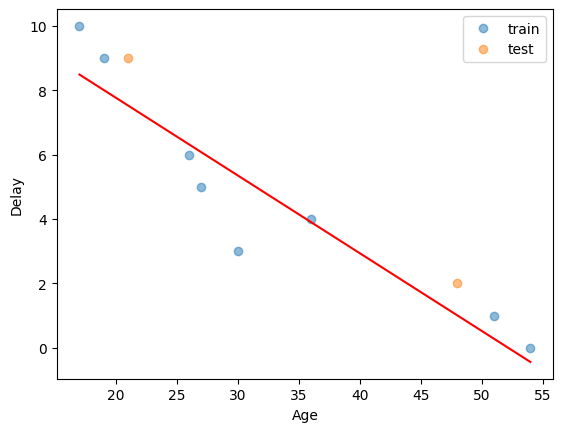

In [28]:
# Let's define the axis
xmin = round(X.min())
xmax = round(X.max())   # ara ve Nadal ;)

# Let's create the values for the x-axis
X_model = np.arange(xmin, xmax+1)

# Now for the y side
y_model = [a0 + a1 * x for x in x_model]

# Let's construct the chart
plt.plot(X_train, y_train, "o", alpha=0.5, label="train")
plt.plot(X_test, y_test, "o", alpha=0.5, label="test")
plt.plot(x_model, y_model,'r'); 
plt.xlabel('Age')
plt.ylabel('Delay')
plt.legend()
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

En principio, pienso que el modelo está bastante acertado. Mi apreciación se basa en:

* el score (R-square) tanto del conjunto de entrenamiento como del de test, es muy alto (cercano a 1) y parecido entre los dos conjuntos. Ésto me hace pensar que el sistema no está overfitted. Quizás sea obvio considerando que solo hay una variable, pero para mi no lo es aun.
* el MSE ofrece un resultado que promete un error menor al 15% tanto en el training como en el test. Algo mayor en este último, pero según entiendo, es razonable que se equivoque algo más con datos desconocidos. Un error de un dia y medio podria ser aceptable para una estimación del retardo por edad.
* El gráfico muestra que los valores de test quedan bastante en la línia marcada por la recta del modelo.

Sin embargo, considero que la muestra es bastante pequeña y quizás un número mayor de datos de entrada podrían arrojar más luz.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [38]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

In [40]:
vehicles.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


In [41]:
vehicles.sample(10)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
14115,Ford,Taurus AWD,2013,3.5,6.0,Automatic (S6),All-Wheel Drive,Large Cars,Regular,15.695714,18,26,21,425.000000,1600
15034,GMC,K15 Pickup 4WD,1986,4.3,6.0,Automatic 4-spd,4-Wheel or All-Wheel Drive,Standard Pickup Trucks,Regular,21.974000,14,18,15,592.466667,2200
2372,BMW,650ci Convertible,2008,4.8,8.0,Automatic (S6),Rear-Wheel Drive,Subcompact Cars,Premium,18.311667,15,23,18,493.722222,2250
32873,Toyota,Corolla,1999,1.8,4.0,Manual 5-spd,Front-Wheel Drive,Compact Cars,Regular,10.987000,27,34,30,296.233333,1100
19249,Jaguar,F-Type V8 S Convertible,2015,5.0,8.0,Automatic (S8),Rear-Wheel Drive,Two Seaters,Premium,18.311667,16,23,18,487.000000,2250
32795,Toyota,Celica Convertible,1992,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Minicompact Cars,Regular,15.695714,18,25,21,423.190476,1600
13584,Ford,Mustang,1999,3.8,6.0,Manual 5-spd,Rear-Wheel Drive,Subcompact Cars,Regular,15.695714,17,27,21,423.190476,1600
30685,Saturn,SC,1995,1.9,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,11.771786,24,36,28,317.392857,1200
32488,Toyota,Camry,1986,2.0,4.0,Manual 5-spd,Front-Wheel Drive,Compact Cars,Regular,12.207778,24,31,27,329.148148,1250
33509,Toyota,Supra,1994,3.0,6.0,Manual 6-spd,Rear-Wheel Drive,Minicompact Cars,Premium,18.311667,15,22,18,493.722222,2250


In [39]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [69]:
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
resultado = 'CO2 Emission Grams/Mile'

seleccion = vehicles[[resultado] + variables]
seleccion.corr()

# 'Fuel Barrels/Year' sería la variable más correlacionada,
# seguida de cerca por 'Fuel Cost/Year' y 'Combined MPG'.
# Por contra, 'Year' la menos significativa.

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [68]:
# Usaré un modelo de regresión lineal con 5 predictores
X = vehicles[variables].values
y = vehicles[resultado].values

# Separemos training y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=321) # fix seed

est = sm.OLS(y_train, X_train)
est = est.fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.868e+06
Date:                Fri, 01 Nov 2024   Prob (F-statistic):                        0.00
Time:                        22:58:04   Log-Likelihood:                     -1.2203e+05
No. Observations:               28761   AIC:                                  2.441e+05
Df Residuals:                   28756   BIC:                                  2.441e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0615      0.001     64.948      0.000       0.060       0.063
x2             0.8195      0.091      9.025      0.000       0.642       0.998
x3            19.9046      0.066    301.163      0.000      19.775      20.034
x4            -2.9687      0.048    -61.545      0.000      -3.063      -2.874
x5             0.0297      0.001     54.582      0.000       0.029       0.031
==============================================================================
Omnibus:                    59278.109   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        262745762.699
Skew:                          17.442   Prob(JB):                         0.00
Kurtosis:                     469.942   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

Según el resumen que ofrece est, la variable más significativa seria 'Fuel Barrels/Year'. Esperable ya que era la que aparecía con una correlación más fuerte. La segunda variable significativa, sin embargo, no es la siguiente más correlacionada sinó 'Combined MPG'. Ésto se puede explicar por la fuerte correlación entre 'Combined MPG' y 'Fuel Cost/Year'.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [ ]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [2]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*